In [24]:
import pandas as pd
import snscrape.modules.twitter as snstwitter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

## Bitcoin

In [4]:
tweet_perday = []
df = pd.DataFrame([])

for i in tqdm(range(400), total=400):
    j = pd.to_datetime('2020-01-01').date() + pd.Timedelta(days=i)
    k = pd.to_datetime('2020-01-01').date() + pd.Timedelta(days=i+1)
    query = f'(btc OR bitcoin OR cryptocurrency OR crypto OR blockchain OR $btc) min_faves:100 lang:en until:{k} since:{j} -is:nullcast'
    tweets = []
    limits = 10000

    for tweet in snstwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limits:
            break
        else:
            tweets.append([tweet.date, tweet.retweetCount,tweet.replyCount, tweet.likeCount,tweet.content])
        
    tweet_perday.append(len(tweets))
    temp = pd.DataFrame(tweets, columns=['Date', 'Retweet', 'Reply', 'Likes', 'Tweet'])
    df = pd.concat([df, temp.sort_values('Likes', ascending=False)], ignore_index=True)

100%|██████████| 400/400 [59:15<00:00,  8.89s/it]


In [ ]:
df.to_csv('BTC_Tweets_v2.csv')

In [6]:
df.shape

(73884, 5)

In [44]:
df=pd.read_csv(r'Dataset\BTC_Tweets_v2.csv', index_col=0)

In [45]:
df.sample(5)

,Date,Retweet,Reply,Likes,Tweet
16998,2020-05-27 15:08:34+00:00,81,13,247,We've also released the new Enjin SDK for @jav...
23857,2020-07-18 17:20:11+00:00,10,3,261,You ever find someone hot and then find out th...
66950,2021-01-18 16:53:36+00:00,22,12,183,"15,000 views 24-hrs\n\nOrange Pill [OP24] - Bi..."
50373,2020-12-08 22:03:49+00:00,46,9,173,"Today is ""Thank You Tuesday!"" Every Tuesday we..."
21066,2020-07-01 21:28:26+00:00,22,12,226,Boom!\n\n@APompliano just guested on @billburr...


In [42]:
df.Date = pd.to_datetime(df.Date).dt.floor('D')

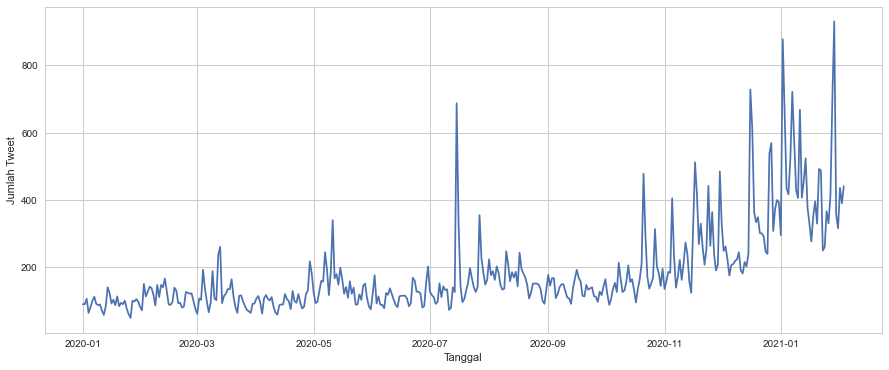

In [43]:
dff = df.groupby('Date')[['Tweet']].count()
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-whitegrid')
plt.plot(dff.index, dff.Tweet)
plt.ylabel('Jumlah Tweet')
plt.xlabel('Tanggal')
plt.show()

## Ethereum

In [9]:
tweet_perday = []
df = pd.DataFrame([])

for i in tqdm(range(400), total=400):
    j = pd.to_datetime('2020-01-01').date() + pd.Timedelta(days=i)
    k = pd.to_datetime('2020-01-01').date() + pd.Timedelta(days=i+1)
    query = f'(eth OR ether OR ethereum OR cryptocurrency OR crypto OR blockchain OR $eth) min_faves:100 lang:en until:{k} since:{j} -is:nullcast'
    tweets = []
    limits = 10000

    for tweet in snstwitter.TwitterSearchScraper(query).get_items():
        if len(tweets) == limits:
            break
        else:
            tweets.append([tweet.date, tweet.retweetCount,tweet.replyCount, tweet.likeCount,tweet.content])
        
    tweet_perday.append(len(tweets))
    temp = pd.DataFrame(tweets, columns=['Date', 'Retweet', 'Reply', 'Likes', 'Tweet'])
    df = pd.concat([df, temp.sort_values('Likes', ascending=False)], ignore_index=True)

100%|██████████| 400/400 [34:56<00:00,  5.24s/it]


In [10]:
df.to_csv('ETH_Tweets_v2.csv')

In [11]:
df.shape

(34922, 5)

In [33]:
df=pd.read_csv(r'Dataset\ETH_Tweets_v2.csv', index_col=0)

In [36]:
df.sample(5)

,Date,Retweet,Reply,Likes,Tweet
8983,2020-06-25 12:56:33+00:00,22,66,364,I'm expecting a HEAVY retracement for both sto...
4753,2020-04-05 01:06:13+00:00,8,2,406,I have nothing to promote except my boii crypt...
19319,2020-10-18 18:22:01+00:00,26,4,216,Absolutely outstanding listen from @tferriss a...
7429,2020-05-31 16:48:04+00:00,62,54,1060,"Before crypto, I was psyched if I made 10% on ..."
16624,2020-09-13 04:43:00+00:00,15,13,256,The innovation and competition happening in #c...


In [37]:
df.Date = pd.to_datetime(df.Date).dt.floor('D')

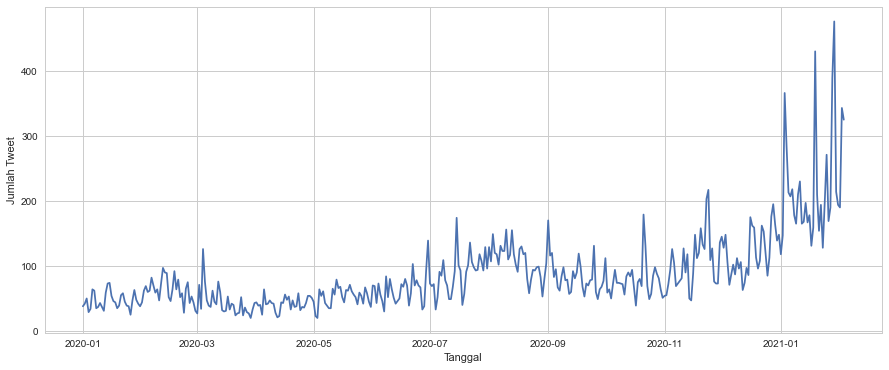

In [40]:
dff = df.groupby('Date')[['Tweet']].count()
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-whitegrid')
plt.plot(dff.index, dff.Tweet)
plt.ylabel('Jumlah Tweet')
plt.xlabel('Tanggal')
plt.show()